In [1]:
import sys
#sys.path.append("/Users/shavindra/Documents/Personal/MLQS/MLQS/combined_model")
#sys.path.append("/Users/shavindra/Documents/Personal/MLQS/MLQS/combined_model")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import butter, filtfilt
from os.path import isfile, join
import zipfile
import os
import json
from pathlib import Path
from personalized_model import analyze

In [13]:
path = Path('./data/Timo')
onlyfiles = [f for f in os.listdir(path) if '.Identifier' not in f]

# Use all zips
zip_files = {}
for filename in onlyfiles:
    name = filename.removesuffix('.zip')
    parts = name.split()
    if len(parts) >= 3:
        key = f"{parts[0]}_{parts[1]}"
        zip_files[key] = filename

print(zip_files)

# Or select specific ones:
# zip_files = {
#     'base_2025-06-06': 'base 2025-06-06 15-45-11.zip',
#     'base_2025-06-07': 'base 2025-06-07 12-17-44.zip', 
#     '200ml_2025-06-07': '200ml 2025-06-07 12-52-34.zip',
#     '230ml_2025-06-06': '230ml 2025-06-06 16-22-45.zip'
# }
# data_path = "/Users/shavindra/Documents/Personal/MLQS/MLQS/data/Timo"
analyzer = analyze.CaffeineAnalyzer(data_path=path, zip_files=zip_files)
analyzer.extract_and_load_data()
analyzer.explore_data_structure()

{'base_2025-06-07': 'base 2025-06-07 12-17-44.zip', '470ml_2025-06-08': '470ml 2025-06-08 15-38-54.zip', '200ml_2025-06-07': '200ml 2025-06-07 12-52-34.zip', 'base_2025-06-08': 'base 2025-06-08 15-05-01.zip', '230ml_2025-06-06': '230ml 2025-06-06 16-22-45.zip', 'base_2025-06-06': 'base 2025-06-06 15-45-11.zip'}

Loading base_2025-06-07 from base 2025-06-07 12-17-44.zip
  Files in base 2025-06-07 12-17-44.zip:
    - Accelerometer.csv
    - Gyroscope.csv
    - Linear Acceleration.csv
    - meta/device.csv
    - meta/time.csv
      Loaded Accelerometer.csv as CSV: shape (16356, 4)
      Loaded Gyroscope.csv as CSV: shape (16322, 4)
      Loaded Linear Acceleration.csv as CSV: shape (8161, 4)

Loading 470ml_2025-06-08 from 470ml 2025-06-08 15-38-54.zip
  Files in 470ml 2025-06-08 15-38-54.zip:
    - Accelerometer.csv
    - Gyroscope.csv
    - Linear Acceleration.csv
    - meta/device.csv
    - meta/time.csv
      Loaded Accelerometer.csv as CSV: shape (20483, 4)
      Loaded Gyroscope.csv 


TREMOR COMPARISON ANALYSIS
Baseline files: {'Gyroscope.csv', 'Accelerometer.csv', 'Linear Acceleration.csv'}
Caffeine files: {'Gyroscope.csv', 'Accelerometer.csv', 'Linear Acceleration.csv'}

Analyzing: Gyroscope.csv
    Analyzing columns: ['Gyroscope_x_rad/s', 'Gyroscope_y_rad/s', 'Gyroscope_z_rad/s']
    Analyzing columns: ['Gyroscope_x_rad/s', 'Gyroscope_y_rad/s', 'Gyroscope_z_rad/s']
    Analyzing columns: ['Gyroscope_x_rad/s', 'Gyroscope_y_rad/s', 'Gyroscope_z_rad/s']
    Analyzing columns: ['Gyroscope_x_rad/s', 'Gyroscope_y_rad/s', 'Gyroscope_z_rad/s']
    Analyzing columns: ['Gyroscope_x_rad/s', 'Gyroscope_y_rad/s', 'Gyroscope_z_rad/s']
    Analyzing columns: ['Gyroscope_x_rad/s', 'Gyroscope_y_rad/s', 'Gyroscope_z_rad/s']
    Gyroscope_x_rad/s_iqr:
      Baseline: 0.083279
      Caffeine: 0.125860
      Change: +51.13%
    Gyroscope_y_rad/s_range:
      Baseline: 1.951911
      Caffeine: 2.421653
      Change: +24.07%
    Gyroscope_z_rad/s_rms:
      Baseline: 0.114156
      Ca

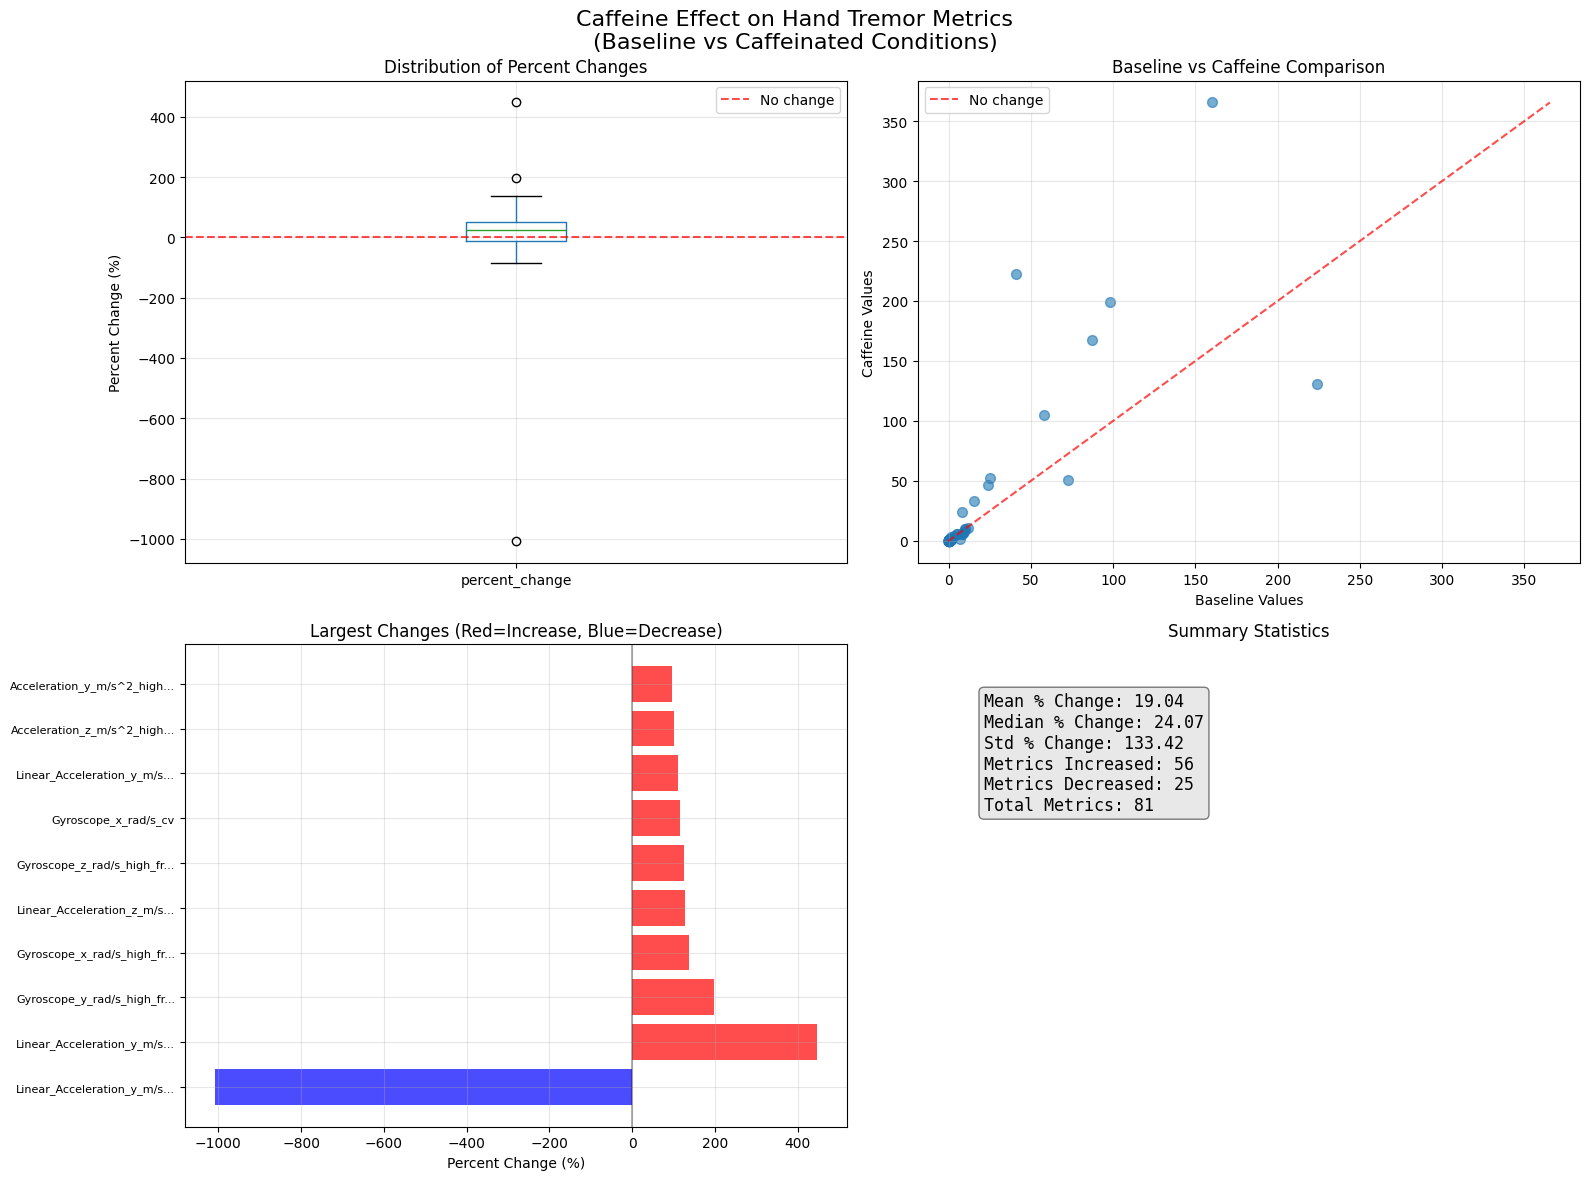


ANALYSIS SUMMARY
QUANTITATIVE RESULTS:
   Total metrics analyzed: 81
   Metrics increased: 56 (69.1%)
   Metrics decreased: 25 (30.9%)
   Average change: +19.04%
   Median change: +24.07%
   Standard deviation: 133.42%
TOP INCREASES:
   Linear_Acceleration_y_m/s^2_cv: +447.1%
   Gyroscope_y_rad/s_high_freq_energy: +198.0%
   Gyroscope_x_rad/s_high_freq_energy: +138.7%
TOP DECREASES:
   Linear_Acceleration_y_m/s^2_mean: -1008.1%
   Acceleration_y_m/s^2_cv: -84.9%
   Acceleration_x_m/s^2_mean: -52.3%
INTERPRETATION:
STRONG SIGNAL: Average change of +19.0% suggests caffeine has a detectable effect on tremor metrics.
High variability (133.4%) suggests heterogeneous effects across different metrics or measurement conditions.


In [3]:
results = analyzer.compare_conditions()
if results:
    print(f"\nCreating visualizations...")
    df_metrics = analyzer.visualize_results(results)
    analyzer.generate_summary_report(results, df_metrics)

In [ ]:
# Nathaniel's files
path = Path('./data/Nathaniel')
onlyfiles = [f for f in os.listdir(path) if '.Identifier' not in f]

# Use all zips
zip_files_nathaniel = {}
for filename in onlyfiles:
    name = filename.removesuffix('.zip')
    zip_files_nathaniel[key] = filename

print(zip_files_nathaniel)
analyzer_nathaniel = analyze.CaffeineAnalyzer(data_path=path, zip_files=zip_files_nathaniel)
analyzer_nathaniel.extract_and_load_data()
analyzer_nathaniel.explore_data_structure()

results_nathaniel = analyzer_nathaniel.compare_conditions()
if results_nathaniel:
    print(f"\nCreating visualizations for Nathaniel...")
    df_metrics_nathaniel = analyzer_nathaniel.visualize_results(results_nathaniel)
    analyzer_nathaniel.generate_summary_report(results_nathaniel, df_metrics_nathaniel)

{'base_2025-06-06': '30min_20mg_caffeine-2025-06-04_14-17-49.zip'}

Loading base_2025-06-06 from 30min_20mg_caffeine-2025-06-04_14-17-49.zip
  Files in 30min_20mg_caffeine-2025-06-04_14-17-49.zip:
    - HeartRate.csv
    - Metadata.csv
    - WatchBarometer.csv
    - Annotation.csv
    - WatchOrientation.csv
    - WatchAccelerometer.csv
    - WatchGravity.csv
    - WatchGyroscope.csv
    - WatchTotalAcceleration.csv
      Loaded WatchAccelerometer.csv as CSV: shape (1100, 5)
      Loaded WatchGyroscope.csv as CSV: shape (1123, 5)

Data loading summary:
Baseline sessions: 1
Caffeine sessions: 0
Total sessions: 1

DATA STRUCTURE ANALYSIS

--- BASE_2025-06-06 ---

File: WatchAccelerometer.csv
  Type: DataFrame
  Shape: (1100, 5)
  Columns: ['time', 'seconds_elapsed', 'z', 'y', 'x']
  Accelerometer columns: []
  Gyroscope columns: []
  Linear acceleration columns: []
  Time columns: ['time']
  Sample data (first 3 rows):
               time  seconds_elapsed         z         y         x
174